## Initialization of the notebook with installation and import of correct versions of libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 13 11:23:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import numpy as np
import tensorflow as tf
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
tfk = tf.keras
tfkl = tfk.layers
import gc
import cv2

In [ ]:
read_small = True

In [ ]:
if read_small:
  !unzip drive/MyDrive/TecnosensSondaOttica/DatasetTS_MA_small.zip -d ./dataset
else:
  !unzip drive/MyDrive/TecnosensSondaOttica/DatasetTS_MA_FT_medium.zip -d ./dataset

unzip:  cannot find or open drive/MyDrive/TecnosensSondaOttica/DatasetTS_MA_small.zip, drive/MyDrive/TecnosensSondaOttica/DatasetTS_MA_small.zip.zip or drive/MyDrive/TecnosensSondaOttica/DatasetTS_MA_small.zip.ZIP.


In [ ]:
datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelRegression/Dataset"

In [ ]:
%ls

drive/  sample_data/


## Setting a seed on all frameworks for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 1234

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Load data and preprocessing

In [ ]:
labels_df = pd.read_csv(datasetPath+"/labels_df2.csv")
#if not read_small:
  #labels_df = pd.read_csv("../drive/MyDrive/TecnosensSondaOttica/labels_df_ft.csv", index_col=False)

In [ ]:
X_train = []
Y_train = []
X_val = []
Y_val = []
X_test = []
Y_test = []

#dir = "DatasetTS_MA_FT_medium"
if read_small:
  dir = datasetPath+"/DatasetTS_MA_small"
directories = os.listdir(dir)
if ".DS_Store" in directories:
    directories.remove(".DS_Store")
directories = [int(dir) for dir in directories]
directories.sort()
directories

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [ ]:
np.random.seed(42)
print(gc.collect())

used_angles = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
if not read_small:
  used_angles = [-5, 5]

for directory in tqdm(directories):
  if directory in used_angles:
    files = os.listdir(dir + '/' + str(directory))
    files.sort()
    files = list(reversed(files))[:1100]
    for file in tqdm(files):
      try:
        distance_str = file.split('-')[0]
        distance_val = int(distance_str)
      except:
        print(f"Impossibile estrarre distanza da {file}")
        continue

      match = labels_df[(labels_df['distance'] == distance_val) & (labels_df['angle'] == directory)]
      if len(match) == 0:
        print(f"Nessuna label trovata per file {file} con distanza {distance_val} e angolo {directory}")
        continue

      train_val_test = np.random.randint(0,100)  # 80-5-15 split

      image = cv2.imread(dir + "/" + str(directory) + "/" + file)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      if train_val_test < 80:
        image = cv2.resize(image, (300,300))
        X_train.append(image.astype('float16')/255)
        Y_train.append([match.iloc[0]['distance'], match.iloc[0]['angle']])
        if len(X_train) != len(Y_train):
          print("male", file)
          print(len(X_train))
          print(len(Y_train))
      elif train_val_test < 85:
        image = cv2.resize(image, (300,300))
        X_val.append(image.astype('float16')/255)
        Y_val.append([match.iloc[0]['distance'], match.iloc[0]['angle']])
      else:
        image = cv2.resize(image, (300,300))
        X_test.append(image.astype('float16')/255)
        Y_test.append([match.iloc[0]['distance'], match.iloc[0]['angle']])
  else:
    print("Angle " + str(directory) + " skipped")


0


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]



```
np.random.seed(42)
print(gc.collect())

used_angles = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
if not read_small:
  used_angles = [-5, 5]

i = 0
for directory in tqdm(directories):
  if directory in used_angles:
    files = os.listdir(dir + '/' + str(directory))
    files.sort()
    files = list(reversed(files))[:1100]
    for file in tqdm(files):
      train_val_test = np.random.randint(0,100) #random value to decide if set of images will be assigned to training, validation or test set (70%,15%,15%)

      if train_val_test < 80:
        image = cv2.imread(dir + "/" + str(directory) + "/" + file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (300,300))
        #image = cv2.GaussianBlur(image, (7,7), 0)
        #image[image>81] = 255
        #image[(image<=81) & (image > 61)] = 175
        #image[(image<=61) & (image > 41)] = 105
        #image[(image<=41) & (image > 21)] = 55
        #image[image<21] = 0
        #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
        X_train.append(image.astype('float16')/255)
        Y_train.append([labels_df[i:i+1]['distance'][i],labels_df[i:i+1]['angle'][i]])
        if len(X_train) != len(Y_train):
          print("male", i)
          print(len(X_train))
          print(len(Y_train))
      elif train_val_test < 85:
        image = cv2.imread(dir + "/" + str(directory) + "/" + file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (446,446))
        #image = cv2.GaussianBlur(image, (7,7), 0)
        #image[image>81] = 255
        #image[(image<=81) & (image > 61)] = 175
        #image[(image<=61) & (image > 41)] = 105
        #image[(image<=41) & (image > 21)] = 55
        #image[image<21] = 0
        #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
        X_val.append(image.astype('float16')/255)
        Y_val.append([labels_df[i:i+1]['distance'][i],labels_df[i:i+1]['angle'][i]])
      else:
        image = cv2.imread(dir + "/" + str(directory) + "/" + file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (446,446))
        #image = cv2.GaussianBlur(image, (7,7), 0)
        #image[image>81] = 255
        #image[(image<=81) & (image > 61)] = 175
        #image[(image<=61) & (image > 41)] = 105
        #image[(image<=41) & (image > 21)] = 55
        #image[image<21] = 0
        #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
        X_test.append(image.astype('float16')/255)
        Y_test.append([labels_df[i:i+1]['distance'][i],labels_df[i:i+1]['angle'][i]])
      i += 1
  else:
    print("Angle " + str(directory) + " skipped")
    i += len(labels_df[labels_df['angle']==directory])
```



In [ ]:
gc.collect()

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype="float32")
print("Shape of Train set's images: " + str(X_train.shape))
print("Shape of Train set's labels: " + str(Y_train.shape))

X_val = np.array(X_val)
Y_val = np.array(Y_val, dtype="float32")
print("Shape of Val set's images: " + str(X_val.shape))
print("Shape of Val set's labels: " + str(Y_val.shape))

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype="float32")
print("Shape of Test set's images: " + str(X_test.shape))
print("Shape of Test set's labels: " + str(Y_test.shape))

Shape of Train set's images: (9673, 300, 300)
Shape of Train set's labels: (9673, 2)
Shape of Val set's images: (590, 300, 300)
Shape of Val set's labels: (590, 2)
Shape of Test set's images: (1837, 300, 300)
Shape of Test set's labels: (1837, 2)


In [ ]:
np.random.seed(1234)
if not read_small:
  indexes = np.random.choice(X_train.shape[0],min(22000,X_train.shape[0]), replace=False)
  X_train = X_train[indexes]
  Y_train = Y_train[indexes]
  indexes = np.random.choice(X_val.shape[0],min(4000,X_val.shape[0]), replace=False)
  X_val = X_val[indexes]
  Y_val = Y_val[indexes]
  indexes = np.random.choice(X_test.shape[0],min(4000,X_test.shape[0]), replace=False)
  X_test = X_test[indexes]
  Y_test = Y_test[indexes]

print("New shape of Train set's images: " + str(X_train.shape))
print("New shape of Train set's labels: " + str(Y_train.shape))
print("New shape of Val set's images: " + str(X_val.shape))
print("New shape of Val set's labels: " + str(Y_val.shape))
print("New shape of Test set's images: " + str(X_test.shape))
print("New shape of Test set's labels: " + str(Y_test.shape))

## Example with thresholding

In [ ]:
image = cv2.imread("DatasetTSsmall/" + directory + "/" + sub_dir + "/" + filename)
image = cv2.GaussianBlur(image, (7,7), 0)
#image_sobel = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
#image_sobel = 255*(image_sobel - np.min(image_sobel))/(np.max(image_sobel) - np.min(image_sobel))
image[image>81] = 255
image[(image<=81) & (image > 61)] = 175
image[(image<=61) & (image > 41)] = 105
image[(image<=41) & (image > 21)] = 55
image[image<21] = 0
plt.imshow(image.astype('uint8'))

## Labels Normalization

In [ ]:
mean = np.mean(Y_train[:,0])
std = np.std(Y_train[:,0])
Y_train[:,0] = (Y_train[:,0] - mean)/std
Y_val[:,0] = (Y_val[:,0] - mean)/std
Y_test[:,0] = (Y_test[:,0] - mean)/std

In [ ]:
np.max(Y_train[:,0]), np.min(Y_train[:,0]), np.mean(Y_train[:,0])

(np.float32(1.7337803), np.float32(-1.733804), np.float32(7.256325e-07))

In [ ]:
mean, std

(np.float32(5901007.5), np.float32(633870.7))

## Save dataset

In [ ]:
save_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelRegression/Dataset/TensorflowDataset"

os.makedirs(save_path, exist_ok=True)

np.save(os.path.join(save_path, "X_train.npy"), X_train)
np.save(os.path.join(save_path, "Y_train.npy"), Y_train)
np.save(os.path.join(save_path, "X_val.npy"), X_val)
np.save(os.path.join(save_path, "Y_val.npy"), Y_val)
np.save(os.path.join(save_path, "X_test.npy"), X_test)
np.save(os.path.join(save_path, "Y_test.npy"), Y_test)


## Open Dataset

In [ ]:
load_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelRegression/Dataset/TensorflowDataset"

X_train = np.load(os.path.join(load_path, "X_train.npy"))
Y_train = np.load(os.path.join(load_path, "Y_train.npy"))
X_val = np.load(os.path.join(load_path, "X_val.npy"))
Y_val = np.load(os.path.join(load_path, "Y_val.npy"))
X_test = np.load(os.path.join(load_path, "X_test.npy"))
Y_test = np.load(os.path.join(load_path, "Y_test.npy"))


## Definition of the models

In [ ]:
def build_standard_model(input_shape, elastic_lambda):

    #Input layer
    input_layer = tfkl.Input(shape=input_shape, name='input')

    #Convolutional block

    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    #conv1 = tfkl.BatchNormalization()(conv1)
    conv1 = tfkl.Activation('relu')(conv1)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)
    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    #conv2 = tfkl.BatchNormalization()(conv2)
    conv2 = tfkl.Activation('relu')(conv2)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)
    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    #conv3 = tfkl.BatchNormalization()(conv3)
    conv3 = tfkl.Activation('relu')(conv3)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)

    conv4 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)
    #conv4 = tfkl.BatchNormalization()(conv4)
    conv4 = tfkl.Activation('relu')(conv4)
    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)

    conv5 = tfkl.Conv2D(
        filters=384,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)
    #conv5 = tfkl.BatchNormalization()(conv5)
    conv5 = tfkl.Activation('relu')(conv5)
    pool5 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv5)

    conv6 = tfkl.Conv2D(
        filters=512,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool5)
    #conv6 = tfkl.BatchNormalization()(conv6)
    conv6 = tfkl.Activation('relu')(conv6)
    pool6 = tfkl.GlobalAveragePooling2D()(conv6)

    #Classification block
    regressor_layer11 = tfkl.Dense(
        units=192,
        name='Regressor1',
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda)
    )(pool6)
    regressor_layer11 = tfkl.Dropout(0.3, seed=seed)(regressor_layer11)

    #Output layer
    out1 = tfkl.Dense(
        units=1,
        activation='linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output1'
    )(regressor_layer11)

    model = tfk.Model(inputs=input_layer, outputs=out1, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanAbsoluteError(), optimizer=tfk.optimizers.Adam(), metrics=[tfk.metrics.MeanAbsoluteError()])

    # Return the model
    return model

###Others

In [ ]:
def build_separable_conv_model(input_shape, elastic_lambda):

    #Input layer
    input_layer = tfkl.Input(shape=input_shape, name='input')

    #Convolutional block
    conv1 = tfkl.SeparableConv2D(
        filters=64,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'valid',
        activation = 'swish',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)
    conv2 = tfkl.SeparableConv2D(
        filters=128,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'valid',
        activation = 'swish',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)
    conv3 = tfkl.SeparableConv2D(
        filters=256,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'valid',
        activation = 'swish',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)

    conv4 = tfkl.SeparableConv2D(
        filters=384,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'valid',
        activation = 'swish',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)

    conv5 = tfkl.Conv2D(
        filters=512,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'valid',
        activation = 'swish',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)

    pool5 = tfkl.GlobalAveragePooling2D()(conv5)

    #Classification block
    regressor_layer11 = tfkl.Dense(
        units=192,
        name='Classifier11',
        activation='swish',
        kernel_initializer = tfk.initializers.HeUniform(seed),
        kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda)
    )(pool5)
    regressor_layer11 = tfkl.Dropout(0.2, seed=seed)(regressor_layer11)

    #Output layer
    out1 = tfkl.Dense(
        units=1,
        activation='linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda),
        name='Output1'
    )(regressor_layer11)

    model = tfk.Model(inputs=input_layer, outputs=out1, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanAbsoluteError(), optimizer=tfk.optimizers.AdamW(), metrics=[tfk.metrics.MeanAbsoluteError()])

    # Return the model
    return model

In [ ]:
def build_cdc_model(input_shape, elastic_lambda):

    #Input layer
    input_layer = tfkl.Input(shape=input_shape, name='input')

    #Convolutional block

    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    conv1 = tfkl.Dropout(0.1, seed=seed)(conv1)
    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv1)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)
    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    conv2 = tfkl.Dropout(0.1, seed=seed)(conv2)
    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv2)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)
    conv3 = tfkl.Conv2D(
        filters=48,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    conv3 = tfkl.Dropout(0.1, seed=seed)(conv3)
    conv3 = tfkl.Conv2D(
        filters=48,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv3)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)

    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)
    conv4 = tfkl.Dropout(0.1, seed=seed)(conv4)
    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv4)
    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)

    conv5 = tfkl.Conv2D(
        filters=96,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)
    conv5 = tfkl.Dropout(0.1, seed=seed)(conv5)
    conv5 = tfkl.Conv2D(
        filters=96,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv5)
    pool5 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv5)

    conv6 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool5)
    conv6 = tfkl.Dropout(0.1, seed=seed)(conv6)
    conv6 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv6)
    pool6 = tfkl.GlobalAveragePooling2D()(conv6)

    #Classification block
    regressor_layer11 = tfkl.Dense(
        units=192,
        name='Regressor1',
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda)
    )(pool6)
    regressor_layer11 = tfkl.Dropout(0.2, seed=seed)(regressor_layer11)

    #Output layer
    out1 = tfkl.Dense(
        units=1,
        activation='linear',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output1'
    )(regressor_layer11)

    model = tfk.Model(inputs=input_layer, outputs=out1, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanAbsoluteError(), optimizer=tfk.optimizers.Adam(), metrics=[tfk.metrics.MeanAbsoluteError()])

    # Return the model
    return model

# Training

In [ ]:
X_train = np.expand_dims(X_train,3)
X_val = np.expand_dims(X_val,3)
X_test = np.expand_dims(X_test,3)

In [ ]:
lam = 1e-4
input_shape = X_train.shape[1:]
model = build_standard_model(input_shape, lam)
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300, 300, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 72, 72, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 36, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 512)      │     1,769,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Regressor1 (Dense)              │ (None, 192)            │        98,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output1 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,141,633 (11.98 MB)

 Trainable params: 3,141,633 (11.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,
                    Y_train[:,0],
                    batch_size=32,
                    epochs=1000,
                    validation_data = (X_val,Y_val[:,0]),
                    callbacks = [tfk.callbacks.EarlyStopping(monitor = 'val_mean_absolute_error', mode = 'min', patience = 10, restore_best_weights=True)]
).history

Epoch 1/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - loss: 0.9770 - mean_absolute_error: 0.8043 - val_loss: 0.1706 - val_mean_absolute_error: 0.1487
Epoch 2/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.2092 - mean_absolute_error: 0.1880 - val_loss: 0.2320 - val_mean_absolute_error: 0.2136
Epoch 3/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1516 - mean_absolute_error: 0.1337 - val_loss: 0.0786 - val_mean_absolute_error: 0.0628
Epoch 4/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1221 - mean_absolute_error: 0.1070 - val_loss: 0.1616 - val_mean_absolute_error: 0.1483
Epoch 5/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1284 - mean_absolute_error: 0.1155 - val_loss: 0.0734 - val_mean_absolute_error: 0.0618
Epoch 6/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1058 - mean_absolute_error: 0.0946 - val_loss: 0.0774 - val_mean_absolute_error: 0.0669
Epoch 7/1000
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1125 - mean_abso

In [ ]:
#gc.collect()

1943

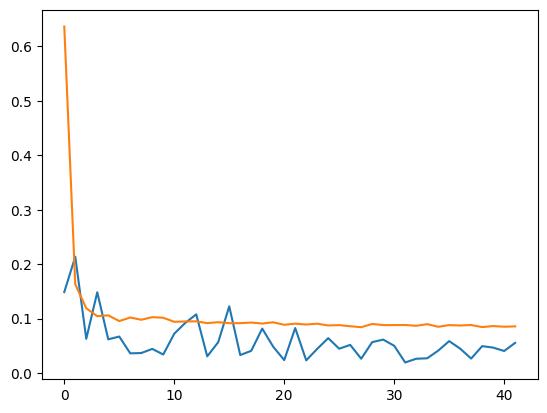

In [ ]:
plt.plot(history['val_mean_absolute_error'])
plt.plot(history['mean_absolute_error'])

## Tuning of lambda regularizer

In [ ]:
lambdas = [1e-3,1e-2,1e-1,1,10]
histories = []
avg_errors = []
total_errors = []
for lam in lambdas:
  print(gc.collect())
  input_shape = X_train.shape[1:]
  model = build_standard_model(input_shape, lam)
  model.summary()
  history = model.fit(X_train,
                      Y_train[:,0],
                      batch_size=128,
                      epochs=1000,
                      validation_data = (X_val,Y_val[:,0]),
                      callbacks = [tfk.callbacks.EarlyStopping(monitor = 'val_mean_absolute_error',mode = 'min', patience = 25, restore_best_weights=True)]
  ).history
  histories.append(history)
  y_val_pred = model.predict(X_val)
  y_test_pred = model.predict(X_test)
  Y_val_rescaled = Y_val[:,0]*std + mean
  y_val_pred_rescaled = y_val_pred*std + mean
  Y_test_rescaled = Y_test[:,0]*std + mean
  y_test_pred_rescaled = y_test_pred*std + mean
  errors = np.abs(Y_test_rescaled[:] - y_test_pred_rescaled[:,0])/1000
  avg_errors.append(np.mean(errors))
  total_errors.append(errors)


2236
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 176, 176, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 176, 176, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 88, 88, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 88, 88, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 44, 44, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 256)       2

## Save the model and collect garbage for resource issues of Colab's RAM

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import os

EXPORT_DIR = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelRegression/Weights/Size300"
MODEL_NAME = "standardRegressionModel_tensorflow_datasetTensorflow01_nameMappingInOrder_1100Class_80train5val15test_lr1e-4"

SAVE_DIR = os.path.join(EXPORT_DIR, MODEL_NAME)
os.makedirs(SAVE_DIR, exist_ok=True)

model.save(os.path.join(SAVE_DIR, f"{MODEL_NAME}.keras"))
gc.collect()

457

## Predictions

In [ ]:
#model_malga = tfk.models.load_model("drive/MyDrive/TecnosensSondaOttica/models/train__days_all_val_all_epoch_14.h5")

In [ ]:
model_ours = tfk.models.load_model(os.path.join(SAVE_DIR, f"{MODEL_NAME}.keras"))

In [ ]:
#model_malga.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 558, 558, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 279, 279, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 277, 277, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 138, 138, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 136, 136, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 68, 68, 128)       0

In [ ]:
model_ours.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 300, 300, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300, 300, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 72, 72, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 36, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 512)      │     1,769,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Regressor1 (Dense)              │ (None, 192)            │        98,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output1 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,424,901 (35.95 MB)

 Trainable params: 3,141,633 (11.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,283,268 (23.97 MB)

In [ ]:
for layer in model_malga.layers:
    print(f"Layer Name: {layer.name}")

    # Check if the layer has trainable weights (e.g., Conv2D or Dense layers)
    if layer.weights:
        # Print common properties
        if isinstance(layer, tf.keras.layers.Conv2D):
          print(f"   Number of Filters: {layer.filters}")
          print(f"   Kernel Size: {layer.kernel_size}")
          print(f"   Strides: {layer.strides}")
          print(f"   Padding: {layer.padding}")

        # Check if it's a pooling layer
        if isinstance(layer, tf.keras.layers.MaxPooling2D) or isinstance(layer, tf.keras.layers.AveragePooling2D):
            print(f"   Pool Size: {layer.pool_size}")

        # Check if it's a Dense layer
        elif isinstance(layer, tf.keras.layers.Dense):
            print(f"   Units: {layer.units}")

        if hasattr(layer, 'kernel_initializer'):
            print(f"   Kernel Initializer: {layer.kernel_initializer.__class__.__name__}")
        if hasattr(layer, 'kernel_regularizer'):
            print(f"   Kernel Regularizer: {layer.kernel_regularizer.__class__.__name__}")

    # Check if it's a Dropout layer
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f"   Dropout Rate: {layer.rate}")

    print("\n")

Layer Name: conv2d
   Number of Filters: 32
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: valid
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: max_pooling2d


Layer Name: conv2d_1
   Number of Filters: 64
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: valid
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: max_pooling2d_1


Layer Name: conv2d_2
   Number of Filters: 128
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: valid
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: max_pooling2d_2


Layer Name: flatten


Layer Name: dense
   Units: 128
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: dense_1
   Units: 1
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType




In [ ]:
for layer in model_ours.layers:
    print(f"Layer Name: {layer.name}")

    # Check if the layer has trainable weights (e.g., Conv2D or Dense layers)
    if layer.weights:
        # Print common properties
        if isinstance(layer, tf.keras.layers.Conv2D):
          print(f"   Number of Filters: {layer.filters}")
          print(f"   Kernel Size: {layer.kernel_size}")
          print(f"   Strides: {layer.strides}")
          print(f"   Padding: {layer.padding}")

        # Check if it's a pooling layer
        if isinstance(layer, tf.keras.layers.MaxPooling2D) or isinstance(layer, tf.keras.layers.AveragePooling2D):
            print(f"   Pool Size: {layer.pool_size}")

        # Check if it's a Dense layer
        elif isinstance(layer, tf.keras.layers.Dense):
            print(f"   Units: {layer.units}")

        if hasattr(layer, 'kernel_initializer'):
            print(f"   Kernel Initializer: {layer.kernel_initializer.__class__.__name__}")
        if hasattr(layer, 'kernel_regularizer'):
            print(f"   Kernel Regularizer: {layer.kernel_regularizer.__class__.__name__}")

    # Check if it's a Dropout layer
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f"   Dropout Rate: {layer.rate}")

    print("\n")

Layer Name: input


Layer Name: conv2d
   Number of Filters: 32
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: same
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: activation


Layer Name: max_pooling2d


Layer Name: conv2d_1
   Number of Filters: 64
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: valid
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: activation_1


Layer Name: max_pooling2d_1


Layer Name: conv2d_2
   Number of Filters: 128
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: valid
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: activation_2


Layer Name: max_pooling2d_2


Layer Name: conv2d_3
   Number of Filters: 256
   Kernel Size: (3, 3)
   Strides: (1, 1)
   Padding: same
   Kernel Initializer: GlorotUniform
   Kernel Regularizer: NoneType


Layer Name: activation_3


Layer Name: max_pooling2d_3


Layer Name: conv2d_4
   Number of Filters: 384
   

In [ ]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [ ]:
np.mean(np.abs(Y_val[:,0] - y_val_pred[:,0])), np.mean(np.abs(Y_test[:,0] - y_test_pred[:,0]))

(np.float32(0.019237852), np.float32(0.019311894))

In [ ]:
mean = np.float32(5901007.5)
std = np.float32(633870.7)


In [ ]:
Y_val_rescaled = Y_val[:,0]*std + mean
y_val_pred_rescaled = y_val_pred*std + mean
Y_test_rescaled = Y_test[:,0]*std + mean
y_test_pred_rescaled = y_test_pred*std + mean

In [ ]:
errors = np.abs(Y_test_rescaled[:] - y_test_pred_rescaled[:,0])/1000

In [ ]:
# Calcolo degli errori
avg_error = np.mean(errors)
max_error = np.max(errors)
min_error = np.min(errors)

# Creazione del testo da salvare
output_text = (
    f"Average error: {avg_error} micrometers\n"
    f"Maximum error: {max_error} micrometers\n"
    f"Minimum error: {min_error} micrometers\n"
)

# Salvataggio nel file
output_file = os.path.join(SAVE_DIR, "error_report.txt")
with open(output_file, "w") as f:
    f.write(output_text)


In [ ]:
print("Average error is " + str(np.mean(errors)) + " micrometers")
print("Maximum error is " + str(np.max(errors)) + " micrometers")
print("Minimum error is " + str(np.min(errors)) + " micrometers")

Average error is 12.241247 micrometers
Maximum error is 77.938 micrometers
Minimum error is 0.0145 micrometers


In [ ]:
for i in range(2,14):
  print("Average error in the range (" + str((i/2)) + "," + str(((i+1)/2)) + ") mm = " + str(np.mean(errors[(Y_test_rescaled/1000<(i+1)*500) & (Y_test_rescaled/1000>i*500)])) + " micrometers")
  print("Maximum error in the range (" + str((i/2)) + "," + str(((i+1)/2)) + ") mm = " + str(np.max(errors[(Y_test_rescaled/1000<(i+1)*500) & (Y_test_rescaled/1000>i*500)])) + " micrometers")
  print("Minimum error in the range (" + str((i/2)) + "," + str(((i+1)/2)) + ") mm = " + str(np.min(errors[(Y_test_rescaled/1000<(i+1)*500) & (Y_test_rescaled/1000>i*500)])) + " micrometers")

Average error in the range (1.0,1.5) mm = nan micrometers


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
for i in range(-5,6):
  print("Average error for angle " + str(i) + ": " + str(np.mean(errors[Y_test[:,1]==i])) + " micrometers")

Average error for angle -5: 13.97086 micrometers
Average error for angle -4: 13.281823 micrometers
Average error for angle -3: 21.488384 micrometers
Average error for angle -2: 9.465443 micrometers
Average error for angle -1: 15.157113 micrometers
Average error for angle 0: 5.9897337 micrometers
Average error for angle 1: 7.486982 micrometers
Average error for angle 2: 12.709856 micrometers
Average error for angle 3: 12.134858 micrometers
Average error for angle 4: 10.083198 micrometers
Average error for angle 5: 13.085064 micrometers


<ipython-input-36-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

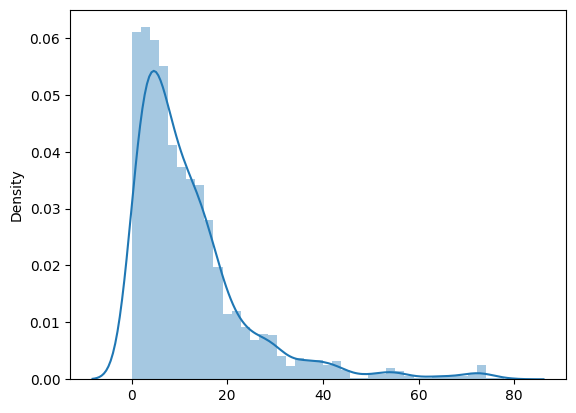

In [ ]:
sns.distplot(errors)

# Prediction

In [ ]:
model1 = tfk.model.load_model("../models/parallel")
model2 = tfk.model.load_model("../models/standard")
model3 = tfk.model.load_model("../models/conv_large")
model4 = tfk.model.load_model("../models/conv_large2")

In [ ]:
predictions1 = model1.predict(X_val/255)
predictions2 = model2.predict(X_val/255)
predictions3 = model3.predict(X_val)
predictions4 = model4.predict(X_val)

In [ ]:
##WEIGHT TUNING
weights = [0.,0.1,0.2,0.3,0.4]
old_acc = 0
for w1 in weights:
  for w2 in weights:
    for w3 in weights:
      for w4 in weights:
        out = np.add(w1*predictions1,w2*predictions2)
        out = np.add(out,w3*predictions3)
        out = np.add(out,w4*predictions4)
        acc = accuracy_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1))
        if acc > old_acc:
          old_acc = acc
          best = [w1, w2, w3, w4]

print("Best accuracy reached: " + str(old_acc))
print("Best weights: " + str(best))

In [ ]:
out = np.add(best[0]*predictions1,best[1]*predictions2)
out = np.add(out,best[2]*predictions3)
out = np.add(out,best[3]*predictions4)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1))

# Compute the classification metrics for each class
print("------------------------------")
for i in range (8):
  accuracy = accuracy_score(np.argmax(Y_val[Y_val[:,i]==1], axis=-1), np.argmax(out[Y_val[:,i]==1], axis=-1))
  precision = precision_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average=None)
  recall = recall_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average=None)
  f1 = f1_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average=None)
  print('Accuracy of class ' , str(i+1) , ": ", accuracy.round(4))
  print('Precision of class ' , str(i+1) , ": ", precision[i].round(4))
  print('Recall of class ' , str(i+1) , ": ", recall[i].round(4))
  print('F1 of class ' , str(i+1) , ": ", f1[i].round(4))
  print("------------------------------")

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1))
precision = precision_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average='macro')
recall = recall_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average='macro')
f1 = f1_score(np.argmax(Y_val, axis=-1), np.argmax(out, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))
